In [2]:
import pandas as pd

ruta = "Dataset_Salud__1000_registros_.csv"
df = pd.read_csv(ruta)

In [3]:
# 1) Forma general
print(df.shape)          # (filas, columnas)

(1000, 8)


In [4]:
# 2) Primeras filas
df.head()

,ID_Paciente,Edad,Sexo,Diagnóstico,Presión_Sistólica,Presión_Diastólica,Hospital,Fecha_Atención
0,1,69,Femenino,Obesidad,123.9,87.0,Hospital A,2021-05-20
1,2,32,Femenino,Obesidad,135.8,81.8,Hospital A,2022-09-10
2,3,89,Masculino,Obesidad,111.6,84.3,Hospital B,2021-05-13
3,4,78,Femenino,Hipertensión,100.1,93.7,Hospital A,2021-06-27
4,5,38,Femenino,Obesidad,152.9,88.6,Hospital A,2023-03-21


In [5]:
# 3) Columnas disponibles
df.columns

Index(['ID_Paciente', 'Edad', 'Sexo', 'Diagnóstico', 'Presión_Sistólica',
       'Presión_Diastólica', 'Hospital', 'Fecha_Atención'],
      dtype='object')

In [6]:
# 4) tipos y valores faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_Paciente         1000 non-null   int64  
 1   Edad                1000 non-null   int64  
 2   Sexo                1000 non-null   object 
 3   Diagnóstico         1000 non-null   object 
 4   Presión_Sistólica   1000 non-null   float64
 5   Presión_Diastólica  1000 non-null   float64
 6   Hospital            1000 non-null   object 
 7   Fecha_Atención      1000 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


# Visualizaciones en Salud con Matplotlib y Seaborn

1. Distribución de variables numéricas
* 📌 Gráfico: Histograma
* 📈 Ejemplo: Distribución de edades

Un histograma es un tipo de gráfico que se usa para visualizar la distribución de una variable numérica.

En vez de mostrar cada valor individual, agrupa los datos en “bins” o contenedores (por ejemplo, edades entre 30-39, 40-49, etc.), y cuenta cuántos valores caen en cada grupo.

Es útil para responder preguntas como:
* ¿Cuáles son los valores más comunes?
* ¿Está la variable distribuida de forma simétrica o asimétrica?
* ¿Hay datos extremos (outliers)?

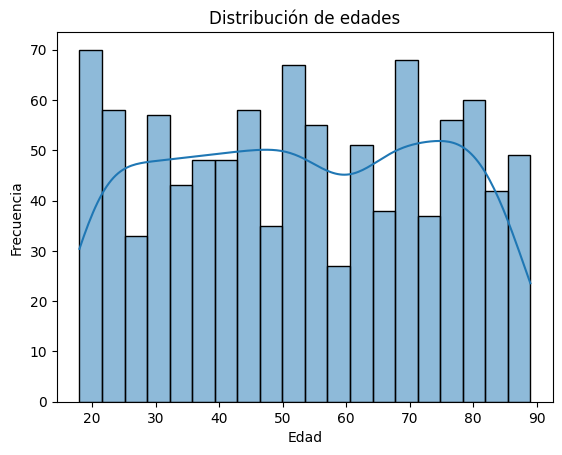

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x="Edad", bins=20, kde=True)
plt.title("Distribución de edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()


¿Dónde parece estar la mayor concentración de pacientes según la edad?

<br>
<hr>

2. Comparación entre grupos
* 📌 Gráfico: Boxplot
* 📈 Ejemplo: Presión sistólica según diagnóstico



Un boxplot (también llamado diagrama de caja y bigotes) es una forma de resumir visualmente cómo se distribuye una variable numérica, mostrando:

La mediana (la línea dentro de la caja).

El 25% y el 75% de los datos (los bordes de la caja, llamados cuartiles).

Los valores extremos (los "bigotes" y puntos fuera de ellos → posibles outliers).

Se usa para comparar fácilmente distribuciones entre distintos grupos.

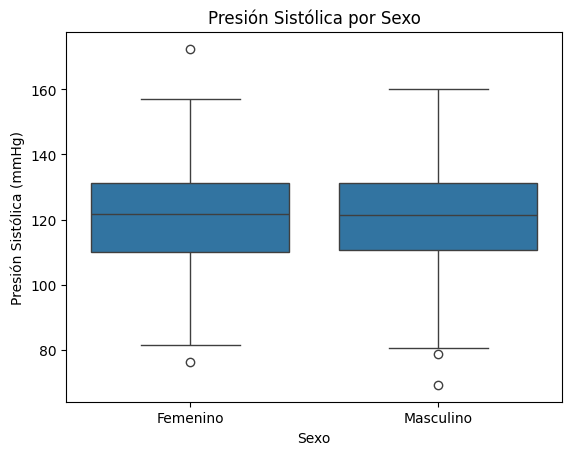

In [13]:
sns.boxplot(data=df, x="Sexo", y="Presión_Sistólica")
plt.title("Presión Sistólica por Sexo")
plt.xlabel("Sexo")
plt.ylabel("Presión Sistólica (mmHg)")
plt.show()

¿Qué grupo parece tener mayor variabilidad en su presión sistólica? ¿Ven puntos fuera de la caja? ¿Qué creen que significan?

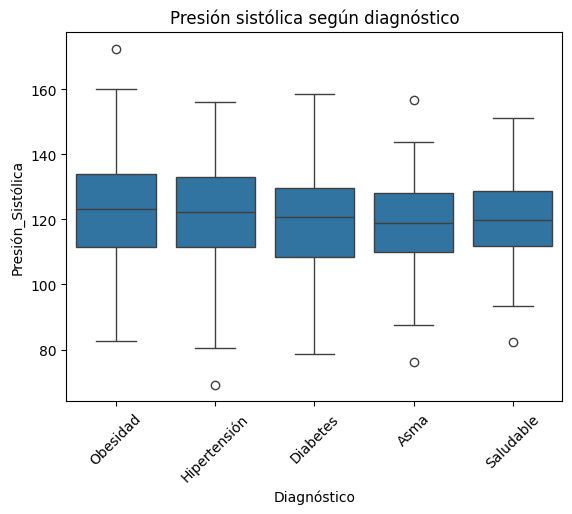

In [14]:
sns.boxplot(data=df, x="Diagnóstico", y="Presión_Sistólica")
plt.title("Presión sistólica según diagnóstico")
plt.xticks(rotation=45)
plt.show()


1. ¿Cuál grupo diagnóstico tiene la mayor mediana de presión sistólica?
  * ¿Qué podría implicar esto clínicamente?

2. ¿En qué grupo hay más valores extremos (outliers)?
  * ¿Eso nos dice algo sobre la variabilidad o casos atípicos?

3. ¿Qué grupos tienen una distribución más “apretada”?
  * ¿Significa eso que hay más control o menor dispersión en la presión?

4. ¿Los pacientes “saludables” tienen realmente presiones más bajas?
  * ¿O se solapan con otros diagnósticos?

5. ¿Hay alguna categoría con una distribución inesperada?
  * Por ejemplo: ¿esperabas que "Hipertensión" tuviera presiones más altas?

6. ¿Qué podríamos investigar más a fondo con estos datos?
  * ¿Sería útil agregar edad o sexo al análisis para ver si hay interacción?

<br>
<hr>

3. Conteo de categorías
* 📌 Gráfico: Barras
* 📈 Ejemplo: Cantidad de pacientes por sexo

Un gráfico de barras compara cantidades entre distintas categorías.
Cada barra representa una categoría, y su altura muestra cuántos casos hay en esa categoría, o bien una estadística como el promedio o porcentaje.

Úsalo cuando:
* tienes una variable categórica (por ejemplo: Diagnóstico, Sexo, Hospital).
* quieres comparar frecuencias o promedios entre esas categorías.



Preguntas que podrías responder:
* ¿Qué diagnóstico es más común entre los pacientes?
* ¿Qué hospital tiene en promedio la presión sistólica más alta?
* ¿Hay más pacientes hombres o mujeres en este registro?

**Comparar cantidad de pacientes por sexo**

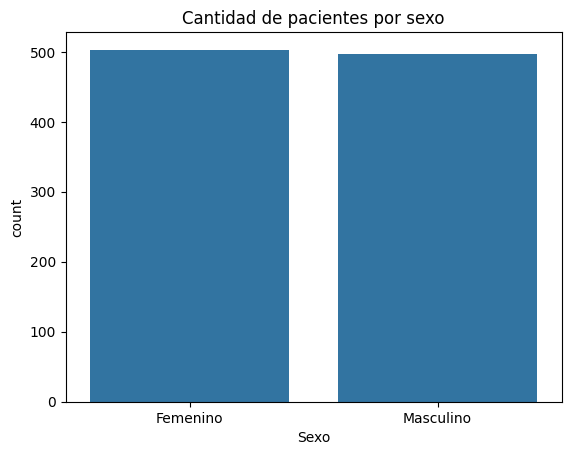

In [16]:
sns.countplot(data=df, x="Sexo")
plt.title("Cantidad de pacientes por sexo")
plt.show()


**Frecuencia por diagnóstico**
¿Cuántos pacientes tienen obesidad, hipertensión, diabetes, etc.?

<Axes: xlabel='Diagnóstico'>

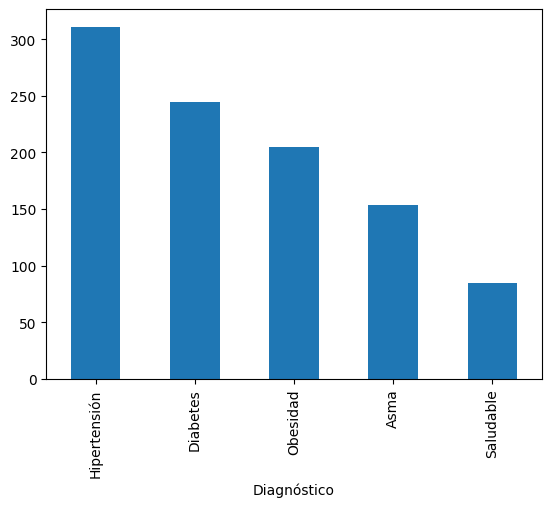

In [15]:
df['Diagnóstico'].value_counts().plot(kind='bar')

**Promedio de presión sistólica por hospital**

<Axes: xlabel='Hospital'>

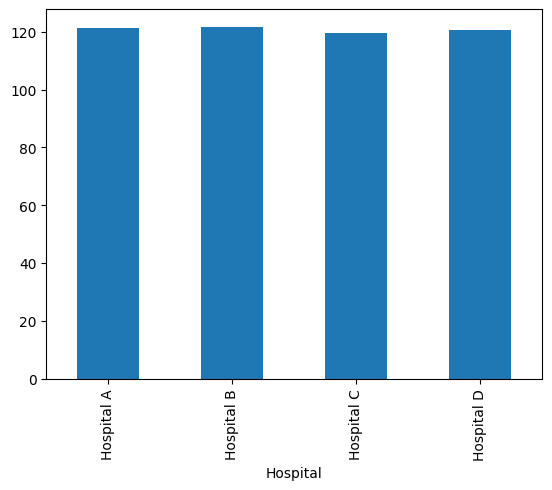

In [17]:
df.groupby('Hospital')['Presión_Sistólica'].mean().plot(kind='bar')

<br>
<hr>


4. Relaciones entre variables
* 📌 Gráfico: Dispersión (scatter)
* 📈 Ejemplo: Edad vs. Presión sistólica

Un gráfico de dispersión muestra cómo se relacionan dos variables numéricas entre sí.
Cada punto en el gráfico representa una observación del dataset.

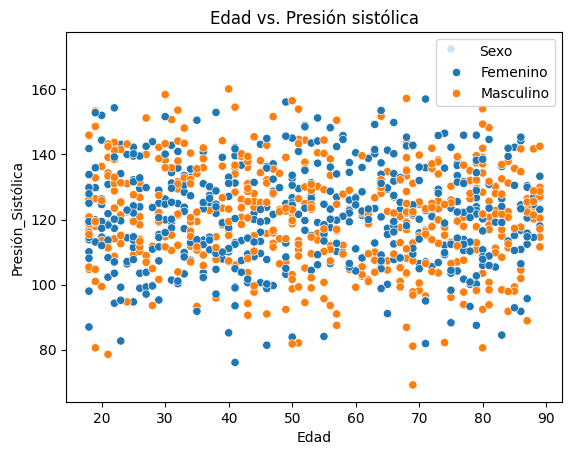

In [10]:
sns.scatterplot(data=df, x="Edad", y="Presión_Sistólica", hue="Sexo")
plt.title("Edad vs. Presión sistólica")
plt.show()


In [20]:
df['Grupo_Edad'] = pd.cut(df['Edad'], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90])

In [21]:
presion_promedio = df.groupby('Grupo_Edad')['Presión_Sistólica'].mean()

/tmp/ipython-input-3699751611.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  presion_promedio = df.groupby('Grupo_Edad')['Presión_Sistólica'].mean()


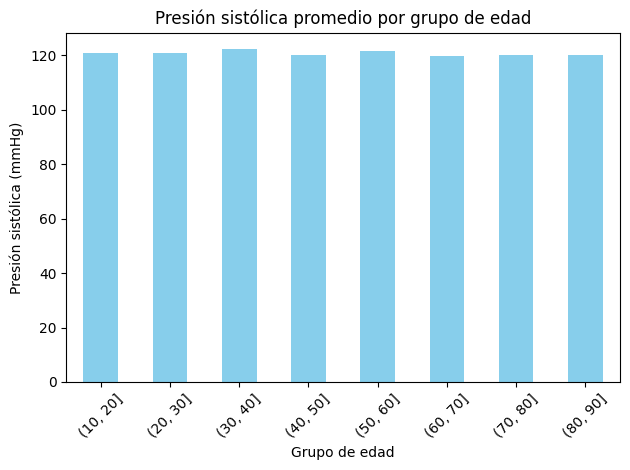

In [22]:
presion_promedio.plot(kind='bar', color='skyblue')
plt.title("Presión sistólica promedio por grupo de edad")
plt.ylabel("Presión sistólica (mmHg)")
plt.xlabel("Grupo de edad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

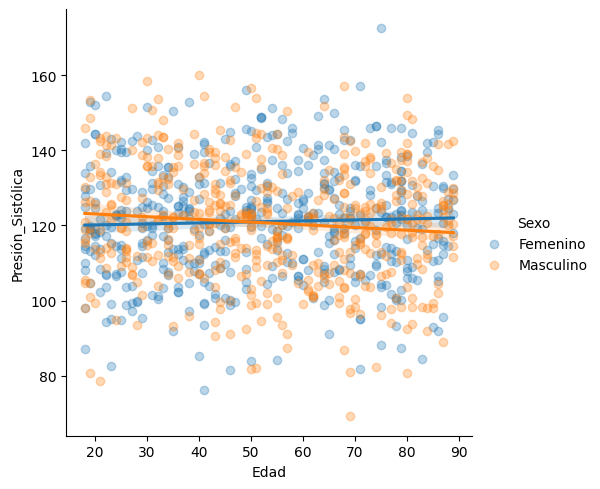

In [23]:
import seaborn as sns
sns.lmplot(data=df, x='Edad', y='Presión_Sistólica', hue='Sexo', scatter_kws={'alpha':0.3})


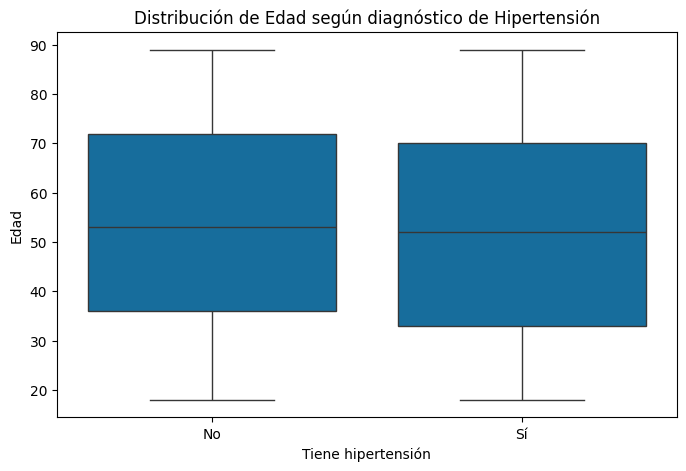

In [62]:
# Paso 1: Creamos variable binaria
df['Es_Hipertenso'] = df['Diagnóstico'].str.lower().str.contains('hiperten')

# Paso 2: Boxplot Edad vs. Hipertensión
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='Es_Hipertenso', y='Edad', data=df)
plt.title('Distribución de Edad según diagnóstico de Hipertensión')
plt.xlabel('Tiene hipertensión')
plt.ylabel('Edad')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()


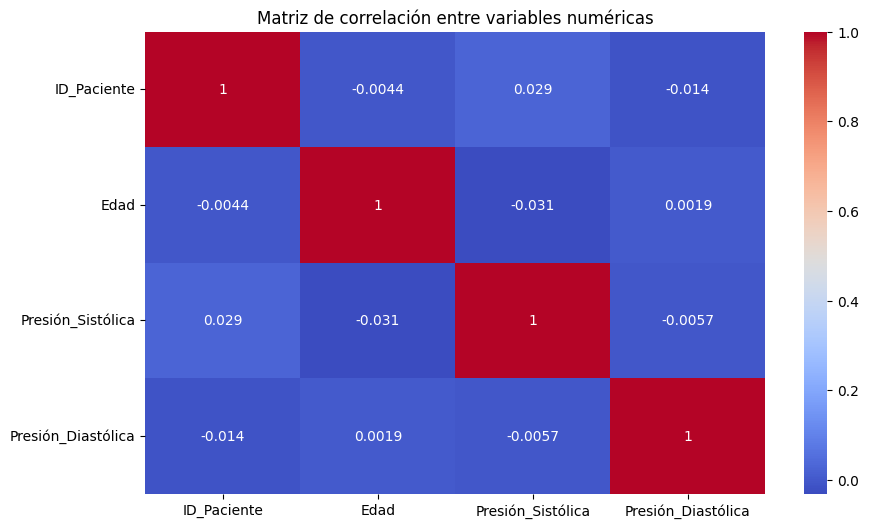

In [63]:
# Solo con variables numéricas
numericas = df.select_dtypes(include='number')

# Matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(numericas.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()


<br>
<hr>

5. Tendencia en el tiempo
* 📌 Gráfico: Línea
* 📈 Ejemplo: Promedio de presión sistólica por mes

Un gráfico de líneas es ideal cuando queremos mostrar cómo cambia una variable a lo largo del tiempo o a lo largo de una secuencia ordenada. Es decir, no es solo mostrar datos, sino mostrar una tendencia o evolución.



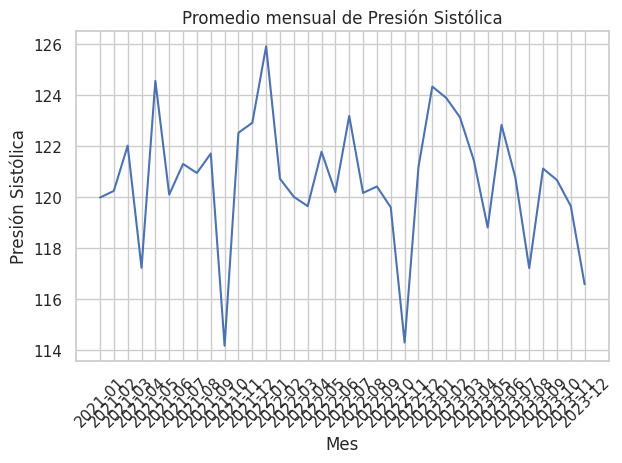

In [66]:
df['Fecha_Atención'] = pd.to_datetime(df['Fecha_Atención'])
df['Mes'] = df['Fecha_Atención'].dt.to_period('M')
promedio_mensual = df.groupby('Mes')['Presión_Sistólica'].mean().reset_index()

plt.plot(promedio_mensual['Mes'].astype(str), promedio_mensual['Presión_Sistólica'])
plt.xticks(rotation=45)
plt.title("Promedio mensual de Presión Sistólica")
plt.ylabel("Presión Sistólica")
plt.xlabel("Mes")
plt.tight_layout()
plt.show()


In [73]:
# Asegúrate de tener pandas y la columna Fecha como datetime
import pandas as pd

ruta = "Dataset_Salud__1000_registros_.csv"
df = pd.read_csv(ruta)


In [74]:
df['Fecha'] = pd.to_datetime(df['Fecha_Atención'])

# Creamos una columna 'Mes' en formato 'YYYY-MM'
df['Mes'] = df['Fecha'].dt.to_period('M').astype(str)


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID_Paciente         1000 non-null   int64         
 1   Edad                1000 non-null   int64         
 2   Sexo                1000 non-null   object        
 3   Diagnóstico         1000 non-null   object        
 4   Presión_Sistólica   1000 non-null   float64       
 5   Presión_Diastólica  1000 non-null   float64       
 6   Hospital            1000 non-null   object        
 7   Fecha_Atención      1000 non-null   object        
 8   Fecha               1000 non-null   datetime64[ns]
 9   Mes                 1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 78.3+ KB


In [76]:
# Agrupamos por mes y calculamos el promedio
promedios_mensuales = df.groupby('Mes')['Presión_Sistólica'].mean().reset_index()

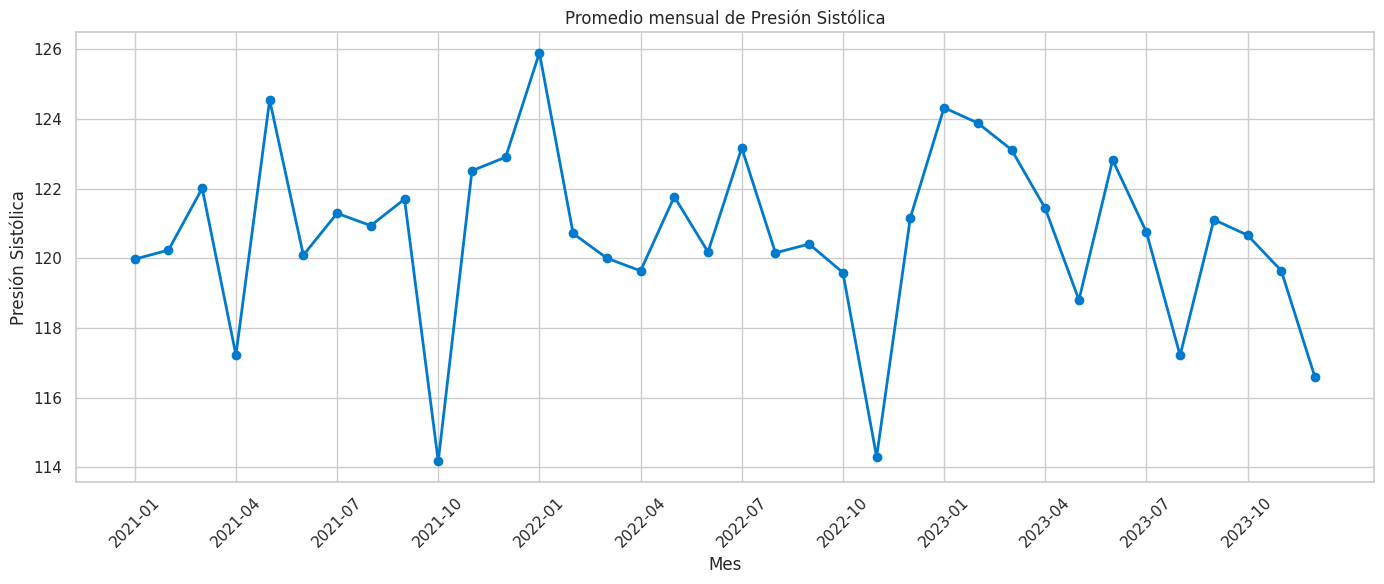

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Línea con marcadores
plt.plot(promedios_mensuales['Mes'], promedios_mensuales['Presión_Sistólica'],
         marker='o', linestyle='-', linewidth=2, color='#007acc')

plt.title('Promedio mensual de Presión Sistólica')
plt.xlabel('Mes')
plt.ylabel('Presión Sistólica')

# Etiquetas más legibles
plt.xticks(rotation=45)
plt.xticks(ticks=range(0, len(promedios_mensuales), 3),
           labels=promedios_mensuales['Mes'][::3])

plt.tight_layout()
plt.show()


# **Evolución de la presión sistólica en dos grupos como personas con obesidad vs. personas con asma**

In [79]:
grupo_obesidad = df[df['Diagnóstico'] == 'Obesidad']

In [80]:
grupo_obesidad.shape

(205, 10)

In [86]:
grupo_asma = df[df['Diagnóstico'] == 'Asma']

In [87]:
grupo_asma.shape

(154, 10)

In [88]:
df['Fecha'] = pd.to_datetime(df['Fecha_Atención'])

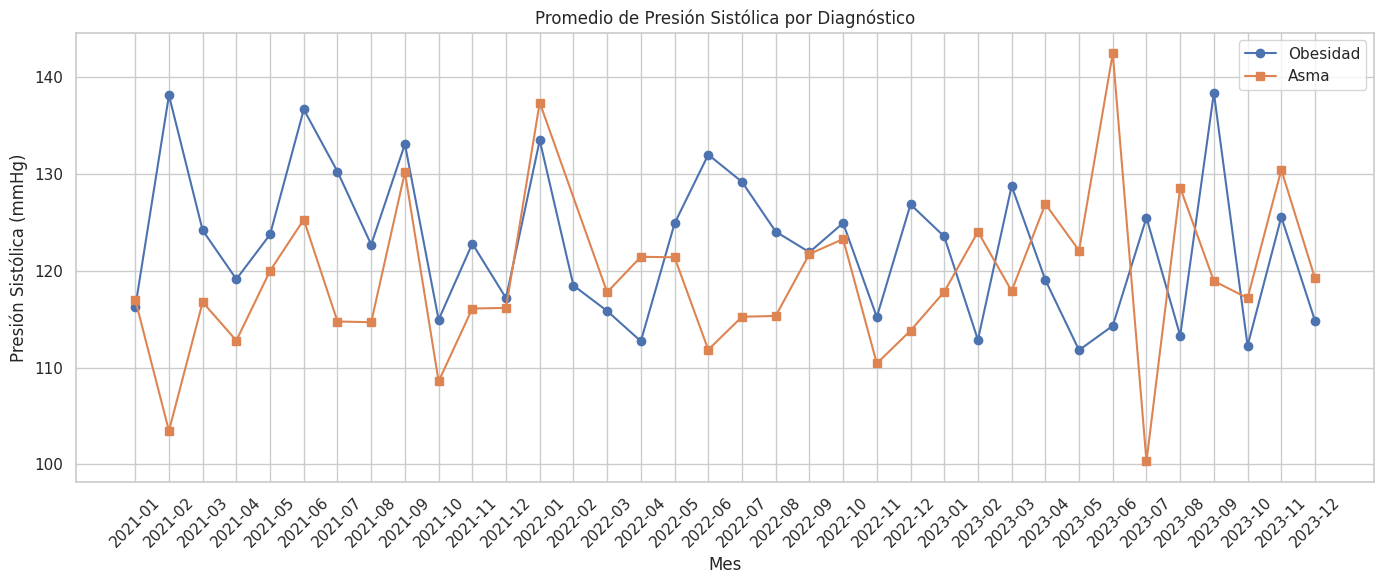

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurar que la fecha está en formato datetime
df['Fecha'] = pd.to_datetime(df['Fecha_Atención'])

# Extraer el mes (año-mes)
df['Mes'] = df['Fecha'].dt.to_period('M').astype(str)

# Filtrar por diagnóstico
obesos = df[df['Diagnóstico'] == 'Obesidad']
asmaticos = df[df['Diagnóstico'] == 'Asma']

# Agrupar y calcular el promedio mensual de presión sistólica
obesos_mensual = obesos.groupby('Mes')['Presión_Sistólica'].mean()
asma_mensual = asmaticos.groupby('Mes')['Presión_Sistólica'].mean()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(obesos_mensual.index, obesos_mensual.values, marker='o', label='Obesidad')
plt.plot(asma_mensual.index, asma_mensual.values, marker='s', label='Asma')

plt.title('Promedio de Presión Sistólica por Diagnóstico')
plt.xlabel('Mes')
plt.ylabel('Presión Sistólica (mmHg)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
